In [18]:
import pandas as pd
import json

data_for_analysis = pd.DataFrame()
with open('media_big.json', 'r') as file:
    for line in file:      
        data = json.loads(line)
        df = pd.json_normalize(data,  "changes", ["fetchdate_orig",	"fetchdate_check", "page_title", "title_new", "page_domain_root", "page_url", "num_changes", "perc_changedchars"])
        data_for_analysis = pd.concat([data_for_analysis, df], sort = False, axis = 0)


In [19]:
data_for_analysis.reset_index().drop(columns = ['index']).head(30)


,from,to,from_range,to_range,fetchdate_orig,fetchdate_check,page_title,title_new,page_domain_root,page_url,num_changes,perc_changedchars
0,Шаги вперед:,Карьерный успех ждет трех знаков зодиака,0-1,0-5,2022-02-11 06:47:26 UTC,2022-02-18 06:47:27 UTC,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
1,эти знаки зодиака продвинутся по карьерной лес...,,5-11,9-9,2022-02-11 06:47:26 UTC,2022-02-18 06:47:27 UTC,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
2,Ð ÐÑÐºÑÑÑÐºÐµ,В Иркутске,0-1,0-1,2022-02-17 06:47:13 UTC,2022-02-18 06:48:12 UTC,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
3,ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿ÐµÑÐµÐµÐ·Ð´Ðµ ÑÑÐ¾Ð»Ð...,февраля на переезде столкнулись грузовик и теп...,3-9,3-9,2022-02-17 06:47:13 UTC,2022-02-18 06:48:12 UTC,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
4,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",0-18,0-15,2022-02-17 06:47:23 UTC,2022-02-18 06:49:08 UTC,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",i38.ru,https://i38.ru:443/obschestvo-obichnie/covid-n...,1,100
5,В ДНР сообщили об обострении ситуации,Обстановка,0-5,0-0,2022-02-17 06:46:49 UTC,2022-02-18 06:48:08 UTC,В ДНР сообщили об обострении ситуации на линии...,Обстановка на линии соприкосновения резко обос...,regnum.ru,https://regnum.ru/news/polit/3509800.html,2,60.61
6,в Донбассе,резко обострилась — ЛНР,9-10,4-7,2022-02-17 06:46:49 UTC,2022-02-18 06:48:08 UTC,В ДНР сообщили об обострении ситуации на линии...,Обстановка на линии соприкосновения резко обос...,regnum.ru,https://regnum.ru/news/polit/3509800.html,2,60.61
7,,(17 февраля 2022 г.),4-4,4-7,2022-02-17 06:47:55 UTC,2022-02-18 06:49:25 UTC,Сегодня в Государственной Думе,Сегодня в Государственной Думе (17 февраля 202...,duma.gov.ru,http://duma.gov.ru/news/53463/,1,24.69
8,Выпущена в обращение,В Азербайджане появилась,0-2,0-2,2022-02-11 06:46:42 UTC,2022-02-18 06:46:31 UTC,Выпущена в обращение новая денежная купюра,В Азербайджане появилась новая 20-манатная купюра,news.day.az,https://news.day.az/economy/1434783.html,2,69.23
9,денежная,20-манатная,4-4,4-4,2022-02-11 06:46:42 UTC,2022-02-18 06:46:31 UTC,Выпущена в обращение новая денежная купюра,В Азербайджане появилась новая 20-манатная купюра,news.day.az,https://news.day.az/economy/1434783.html,2,69.23


In [20]:
from datetime import datetime

def change_time(dt):
  dt_new = dt.replace(' UTC', '')
  return datetime.strptime(dt_new, '%Y-%m-%d %H:%M:%S')

data_for_analysis['fetchdate_orig'] = data_for_analysis['fetchdate_orig'].apply(change_time)
data_for_analysis['fetchdate_check'] = data_for_analysis['fetchdate_check'].apply(change_time)

data_for_analysis

,from,to,from_range,to_range,fetchdate_orig,fetchdate_check,page_title,title_new,page_domain_root,page_url,num_changes,perc_changedchars
0,Шаги вперед:,Карьерный успех ждет трех знаков зодиака,0-1,0-5,2022-02-11 06:47:26,2022-02-18 06:47:27,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
1,эти знаки зодиака продвинутся по карьерной лес...,,5-11,9-9,2022-02-11 06:47:26,2022-02-18 06:47:27,Шаги вперед: в конце зимы эти знаки зодиака пр...,Карьерный успех ждет трех знаков зодиака в кон...,sb.by,https://www.sb.by/articles/shagi-vpered-v-kont...,2,79.23
0,Ð ÐÑÐºÑÑÑÐºÐµ,В Иркутске,0-1,0-1,2022-02-17 06:47:13,2022-02-18 06:48:12,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
1,ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿ÐµÑÐµÐµÐ·Ð´Ðµ ÑÑÐ¾Ð»Ð...,февраля на переезде столкнулись грузовик и теп...,3-9,3-9,2022-02-17 06:47:13,2022-02-18 06:48:12,Ð ÐÑÐºÑÑÑÐºÐµ 17 ÑÐµÐ²ÑÐ°Ð»Ñ Ð½Ð° Ð¿Ð...,В Иркутске 17 февраля на переезде столкнулись ...,i38.ru,https://i38.ru:443/proisshestviya-obichnie/v-i...,2,95.65
0,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",0-18,0-15,2022-02-17 06:47:23,2022-02-18 06:49:08,COVID-Ð½Ð¾Ð²Ð¾ÑÑÐ¸: Â«Ð¿ÑÐ¸Ñ Ð¾ÐºÐ¾Ð²Ð¸Ð´Â»...,"COVID-новости: «психоковид», как лечиться дома...",i38.ru,https://i38.ru:443/obschestvo-obichnie/covid-n...,1,100
...,...,...,...,...,...,...,...,...,...,...,...,...
0,в,здоровья,14-14,14-14,2022-02-19 15:46:55,2022-02-20 15:47:29,В мире за время пандемии зарегистрировали боле...,В мире за время пандемии зарегистрировали боле...,allkharkov.ua,https://allkharkov.ua/news/idn/547549.html,1,3.45
0,в,происшествий,14-14,14-14,2022-02-19 13:16:47,2022-02-20 13:16:14,В Донецкой области из-за обстрела остановлена ...,В Донецкой области из-за обстрела остановлена ...,allkharkov.ua,https://allkharkov.ua/news/idn/547543.html,1,4.8
0,помощнику министра обороны Беларуси,,14-17,14-14,2022-02-28 03:31:52,2022-03-07 03:31:16,Беларусь может пойти войной против Украины – с...,Беларусь может пойти войной против Украины – с...,obozrevatel.com,https://news.obozrevatel.com/society/zdes-tech...,1,15.77
0,в банкоматах,,14-15,14-14,2022-02-26 03:32:14,2022-03-05 03:33:15,«Как будто играешь в игру — «Найди банкомат с ...,«Как будто играешь в игру — «Найди банкомат с ...,bfm.ru,https://www.bfm.ru/news/493857,1,6.78


<AxesSubplot:xlabel='fetchdate_check', ylabel='Count'>

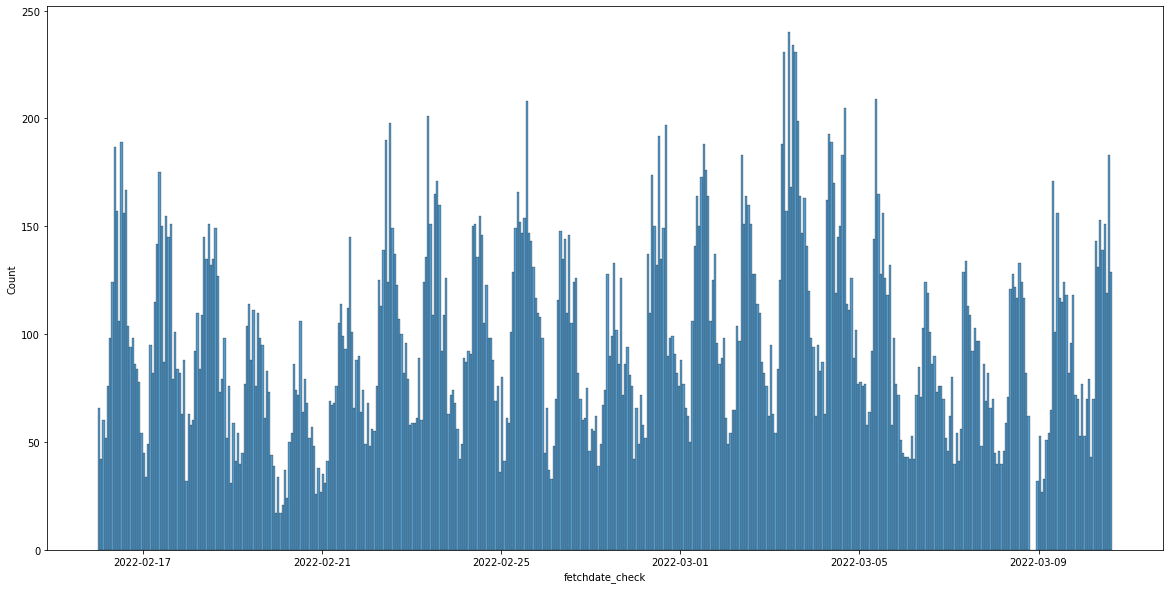

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.histplot(data_for_analysis["fetchdate_check"], binwidth=0.05)



In [23]:
list_of_media = pd.DataFrame(data_for_analysis.page_domain_root.value_counts())

result = list_of_media.to_csv()

with open("list_of_media", "w") as new_file:
    new_file.write(result)


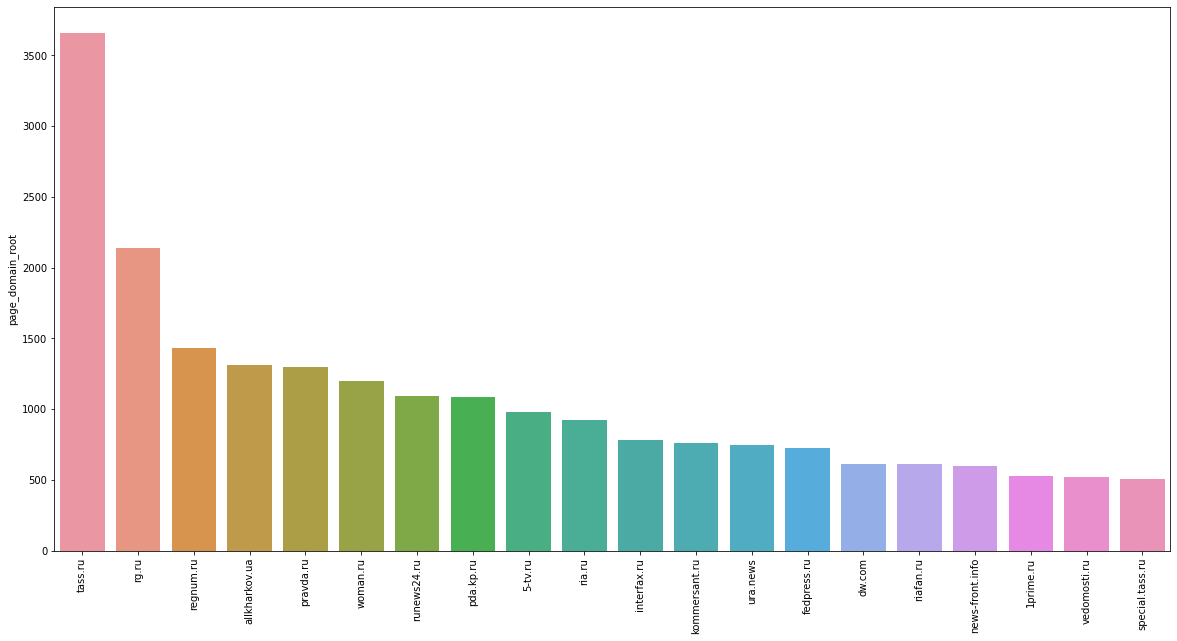

In [24]:

plt.figure(figsize=(20, 10))
sns.barplot(data=list_of_media.head(20), x=list_of_media.head(20).index, y="page_domain_root")
plt.xticks(rotation=90)
plt.show()
